## Heart Disease Research
In this project, I reviewed and analyzed data from a sample of patients evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). We will study a number of **quantitative, binary, and categorical variables**, produce **boxplots**, and utilize **hypothesis testing** to better understand the relationships between the variables. This project was completed in the *Master Statistics with Python* skill path on Codecademy.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [9]:
# load data
heart = pd.read_csv(r"C:\Users\esait\OneDrive\Dataquest\Master Statistics with Python - Codeacademy\heart.csv")
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


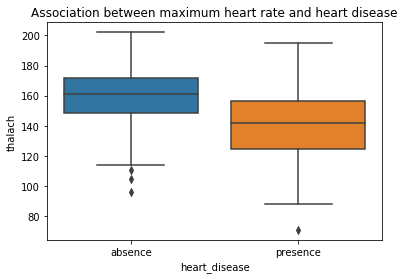

In [21]:
# Predictors of heart disease
sns.boxplot(data=heart, x='heart_disease', y='thalach')
plt.title('Association between maximum heart rate and heart disease')
plt.show()

In [18]:
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

# mean difference 
diff_avg = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print("Difference of the mean of the maximum heart rate between people with and without heart disease:", diff_avg)

# median difference
diff_med = np.median(thalach_no_hd) - np.median(thalach_hd)
print("Difference of the median of the maximum heart rate between people with and without heart disease:", diff_med)

Difference of the mean of the maximum heart rate between people with and without heart disease: 19.11905597473242
Difference of the median of the maximum heart rate between people with and without heart disease: 19.0


In [33]:
# Two-sample t-test, maximum heart rate and heart disease
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print("P-value for Maximum Heart Rate and Heart Disease association:", pval)

P-value for Maximum Heart Rate and Heart Disease association: 3.456964908430172e-14


Given that the p-value is less than the significance threshold of 0.05, we reject the null hypothesis and conclude that there is a significant difference in the maximum heart rate between people with and people without heart disease.

In [22]:
# Two_sample t-test, Cholesterol and heart disease
chol_hd = heart.chol[heart.heart_disease == 'presence']
chol_no_id = heart.chol[heart.heart_disease == 'absence']
tstat, pval = ttest_ind(chol_hd, chol_no_id)
print("P-value for Cholesterol and Heart Disease association:", pval)

P-value for Cholesterol and Heart Disease association: 0.13914167020436527


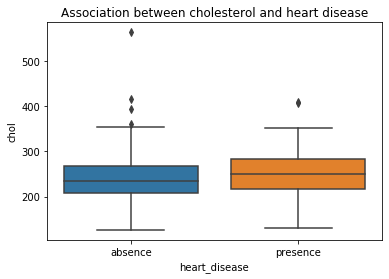

In [20]:
plt.clf()
sns.boxplot(data=heart, x='heart_disease', y='chol')
plt.title('Association between cholesterol and heart disease')
plt.show()

Given the pval of 0.139 for the association between cholesterol and heart disease, which is greater than the 0.05 significance threshold, we can determine that cholesterol is not significantly associated with heart disease.

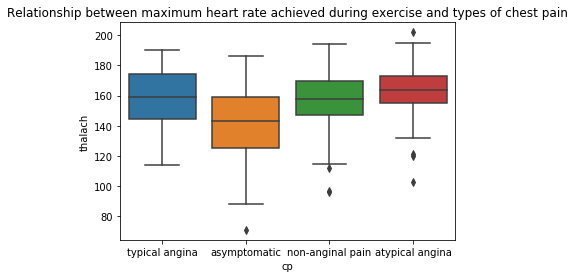

In [31]:
plt.clf()
sns.boxplot(data=heart, x='cp', y='thalach')
plt.title("Relationship between maximum heart rate achieved during exercise and types of chest pain")
plt.show()

In [24]:
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

In [25]:
# ANOVA test, types of chest pain and maximum heart rate
fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print("P-value for forms of chest pain regarding maximum heart rate:", pval)

P-value for forms of chest pain regarding maximum heart rate: 1.9065505247705008e-10


Given that the pval in the ANOVA test for chest pain and maximum heart rate is 1.9e-10, which is less than the significance threshold of 0.05, we will reject the null hypothesis that states that all people have the same average maximum heart rate. 

In [26]:
# Tukey's range test, maximum heart rate and chest pain
tukey_results = pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)
print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


According to the Tukey results, we can determine that the following pairs of chest pain have a significant difference in the maximum heart rate: asymptomatic and atypical angina; asymptomatic and non-anginal pain; asymptomatic and typical angina. 

In [28]:
# Contingency table, chest pain versus heart disease
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print("Contingency table of chest pain and heart disease")
print(Xtab)

Contingency table of chest pain and heart disease
heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


In [32]:
# Chi-square test, chest pain and heart disease diagnosis
chi2, pval, dof, expected = chi2_contingency(Xtab)
print("P-value between chest pain and diagnosis of heart disease:", pval)

P-value between chest pain and diagnosis of heart disease: 1.2517106007837527e-17


Given the pvalue of 1.25e-17, which is less than the significance threshold of 0.05, we will reject the null hypothesis and determine that there is a significant difference between the chest pain type and heart disease.